In [4]:
from functions import *
import torch.optim as optim

T = torch.tensor([1])
dt = torch.tensor([0.01])
S0 = torch.tensor([1])
q = torch.tensor([0.01])
A = torch.tensor([2, 1.6, 1.2, 0.8, 0.4, 0.2])
B = torch.tensor([1, 0.8, 0.6, 0.4, 0.2, 0.1])
Q = torch.tensor([300]) # this quantity doesn't matter since I changed the reward function
z = torch.tensor([10, 20, 30, 40, 50, 60])
delta = torch.tensor([0.01])
gamma = torch.tensor([0.01])
sigma = torch.tensor([0.05])

# use cuda if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
T = T.to(device)
dt = dt.to(device)
S0 = S0.to(device)
q = q.to(device)
A = A.to(device)
B = B.to(device)
Q = Q.to(device)
z = z.to(device)
delta = delta.to(device)
gamma = gamma.to(device)
sigma = sigma.to(device)

In this following, I am gonna train the network by using four different network structures, and choose the one that minimize the loss function for the policy iteration algorithm

In [2]:
loss_different_networks = []

In [3]:
import torch.optim as optim

policy_net = Net(3, 12, nn.Sigmoid()).to(device)
value_net = Net(3, 1, nn.Identity()).to(device)
optimizer = optim.Adam(value_net.parameters(), lr = 0.01)
loss_policy = []
for epoch in range(50):
    S, buy_orders, sell_orders, q, t, bid_vectors, ask_vectors = initial_Train_Data_Simulation(T, dt, sigma, S0, A, B, Q, z, delta, gamma, policy_net)
    loss = total_loss(value_net, S, q, t, dt, buy_orders, sell_orders, z, delta, Q, A, B, gamma)
    for batch in range(15):
        S, buy_orders, sell_orders, q, t, bid_vectors, ask_vectors = initial_Train_Data_Simulation(T, dt, sigma, S0, A, B, Q, z, delta, gamma, policy_net)
        loss += total_loss(value_net, S, q, t, dt, buy_orders, sell_orders, z, delta, Q, A, B, gamma)
    loss_policy.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch: ', epoch, 'loss: ', loss.item())


epoch:  0 loss:  26387.083984375
epoch:  1 loss:  13508.3896484375
epoch:  2 loss:  42225.7734375
epoch:  3 loss:  22870.244140625
epoch:  4 loss:  12014.083984375
epoch:  5 loss:  6435.6591796875
epoch:  6 loss:  6517.9267578125
epoch:  7 loss:  39662.88671875
epoch:  8 loss:  73461.078125
epoch:  9 loss:  15847.9326171875
epoch:  10 loss:  4049.694091796875
epoch:  11 loss:  4469.12841796875
epoch:  12 loss:  8837.80078125
epoch:  13 loss:  35934.3046875
epoch:  14 loss:  15785.2861328125
epoch:  15 loss:  45098.24609375
epoch:  16 loss:  14911.6875
epoch:  17 loss:  22047.744140625
epoch:  18 loss:  11545.0322265625
epoch:  19 loss:  17780.482421875
epoch:  20 loss:  19798.40234375
epoch:  21 loss:  20425.513671875
epoch:  22 loss:  11735.4970703125
epoch:  23 loss:  13092.97265625
epoch:  24 loss:  27530.572265625
epoch:  25 loss:  6014.84912109375
epoch:  26 loss:  26767.72265625
epoch:  27 loss:  13388.560546875
epoch:  28 loss:  9457.5400390625
epoch:  29 loss:  22039.50390625
e

In [5]:
import matplotlib.pyplot as plt
%matplotlib ipympl

loss_different_networks.append(loss_policy)
plt.figure()
plt.plot(loss_policy)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs epoch for value network')


NameError: name 'loss_policy' is not defined

In [3]:
res_mlp_value = ResNet(3, 1, nn.ReLU()).to(device)
res_mlp_policy = ResNet(3, 12, nn.Sigmoid()).to(device)
optimizer = optim.Adam(res_mlp_value.parameters(), lr = 0.001)
loss_policy = []
for epoch in range(50):
    S, buy_orders, sell_orders, q, t, bid_vectors, ask_vectors = initial_Train_Data_Simulation(T, dt, sigma, S0, A, B, Q, z, delta, gamma, res_mlp_policy)
    loss = total_loss(res_mlp_value, S, q, t, dt, buy_orders, sell_orders, z, delta, Q, A, B, gamma)
    for batch in range(15):
        S, buy_orders, sell_orders, q, t, bid_vectors, ask_vectors = initial_Train_Data_Simulation(T, dt, sigma, S0, A, B, Q, z, delta, gamma, res_mlp_policy)
        loss += total_loss(res_mlp_value, S, q, t, dt, buy_orders, sell_orders, z, delta, Q, A, B, gamma)
    loss_policy.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch: ', epoch, 'loss: ', loss.item())

loss_different_networks.append(loss_policy)

NameError: name 'optim' is not defined

In [ ]:
plt.figure()
plt.plot(loss_policy)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs epoch for resnet value network')
plt.show()

In [6]:
res_cnn_value = ResNet_Conv(3, 1, 1, 2, 3, nn.Identity()).to(device)
res_cnn_policy = ResNet_Conv(3, 12, 1, 2, 3, nn.Sigmoid()).to(device)
optimizer = torch.optim.Adam(res_cnn_value.parameters(), lr=0.01)
loss_policy = []
for epoch in range(50):
    S, buy_orders, sell_orders, q, t, bid_vectors, ask_vectors = initial_Train_Data_Simulation(T, dt, sigma, S0, A, B, Q, z, delta, gamma, res_cnn_policy)
    loss = total_loss(res_cnn_value, S, q, t, dt, buy_orders, sell_orders, z, delta, Q, A, B, gamma)
    for batch in range(15):
        S, buy_orders, sell_orders, q, t, bid_vectors, ask_vectors = initial_Train_Data_Simulation(T, dt, sigma, S0, A, B, Q, z, delta, gamma, res_cnn_policy)
        loss += total_loss(res_cnn_value, S, q, t, dt, buy_orders, sell_orders, z, delta, Q, A, B, gamma)
    loss_policy.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch: ', epoch, 'loss: ', loss.item())

loss_different_networks.append(loss_policy)

KeyboardInterrupt: 

[2837.503173828125, 2957873.75, 100095.390625, 801674.625, 350322.0, 240529.03125, 1052575.25, 23645.865234375, 1523.3265380859375, 6250.416015625, 33039.5625, 181021.375, 104921.9609375, 4634.751953125, 347976.59375, 34732.86328125, 13604.578125, 61726.85546875, 84536.75, 1201038.875, 111725.828125, 183483.96875, 51.06756591796875, 12176.6884765625, 11095.3876953125, 640.0875854492188, 7105.5400390625, 970589.3125, 17606.1875, 163931.53125, 892.0684204101562, 163342.65625, 449091.71875, 560.268310546875, 30505.404296875, 8856.517578125, 86343.7578125, 4150.25244140625, 30125.130859375, 21776.529296875, 4118.1279296875, 96.34400939941406, 4218.38525390625, 222.78623962402344, 292.5121154785156, 83501.28125, 1859.68896484375, 10730.51953125, 23646.150390625, 211620.46875, 2677.79736328125, 4257.23974609375, 15602.0107421875, 117887.484375, 11706.248046875, 117490.0, 4005.2451171875, 49697.9296875, 1153306.5, 6555.29443359375]


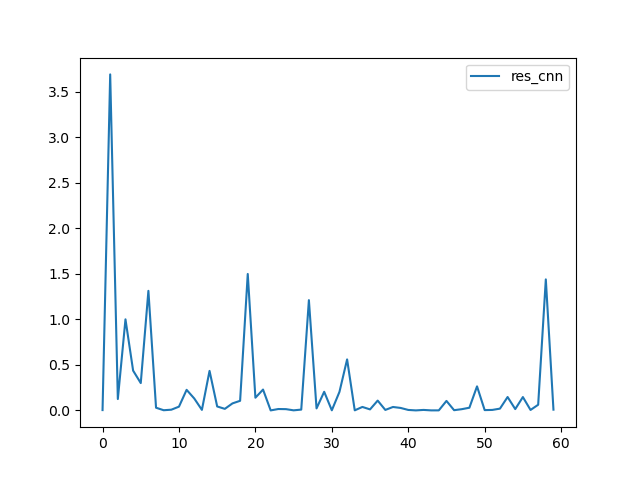

In [20]:
plt.figure()
plt.plot(loss_policy)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs epoch for resnet conv value network')
plt.show()

epoch:  0 loss:  10388.921875
epoch:  1 loss:  26689.501953125


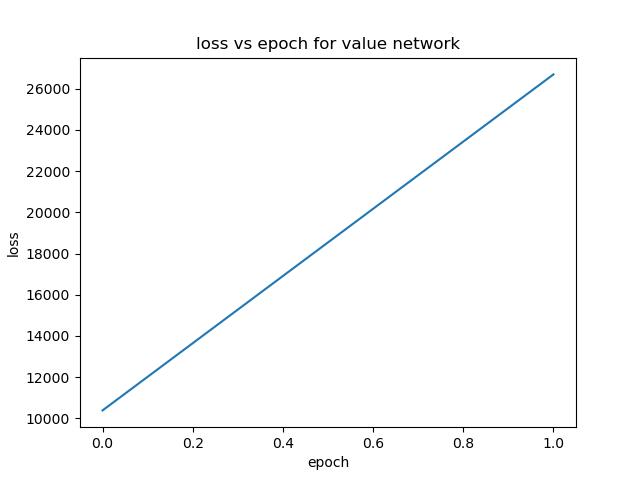

epoch:  2 loss:  6459.70556640625
epoch:  3 loss:  16076.5224609375
epoch:  4 loss:  10959.30859375
epoch:  5 loss:  6497.048828125
epoch:  6 loss:  22032.107421875
epoch:  7 loss:  14777.638671875
epoch:  8 loss:  26312.388671875
epoch:  9 loss:  6751.1513671875


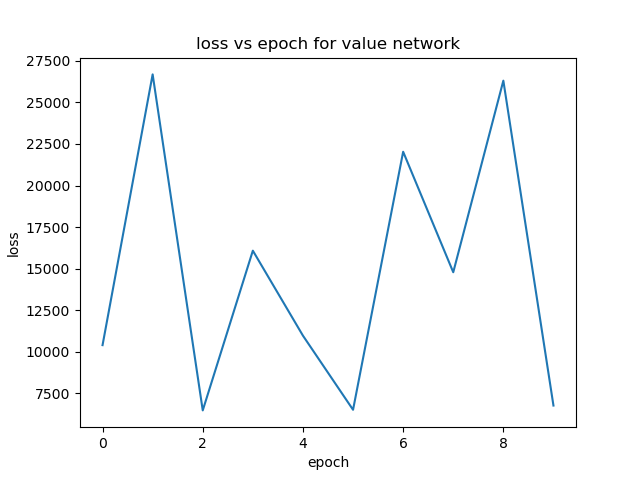

epoch:  10 loss:  8965.3837890625
epoch:  11 loss:  20579.611328125
epoch:  12 loss:  31511.138671875


KeyboardInterrupt: 

In [3]:
import matplotlib.pyplot as plt
%matplotlib ipympl

cnn_value = CNN(3, 1, nn.ReLU()).to(device)
cnn_policy = CNN(3, 12, nn.Sigmoid()).to(device)
optimizer = torch.optim.Adam(cnn_value.parameters(), lr=0.01)
loss_policy = []
for epoch in range(50):
    S, buy_orders, sell_orders, q, t, bid_vectors, ask_vectors = initial_Train_Data_Simulation(T, dt, sigma, S0, A, B, Q, z, delta, gamma, cnn_policy)
    loss = total_loss(cnn_value, S, q, t, dt, buy_orders, sell_orders, z, delta, Q, A, B, gamma)
    for batch in range(15):
        S, buy_orders, sell_orders, q, t, bid_vectors, ask_vectors = initial_Train_Data_Simulation(T, dt, sigma, S0, A, B, Q, z, delta, gamma, cnn_policy)
        loss += total_loss(cnn_value, S, q, t, dt, buy_orders, sell_orders, z, delta, Q, A, B, gamma)
    loss_policy.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch: ', epoch, 'loss: ', loss.item())
    if epoch % 8 == 1:
        plt.figure()
        plt.plot(loss_policy)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title('loss vs epoch for value network')
        plt.show()

loss_different_networks.append(loss_policy)


In [ ]:
plt.figure()
plt.plot(loss_policy)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs epoch for cnn value network')
plt.show()

In [ ]:
#save the loss_different_networks as numpy array
import numpy as np
np.save('loss_different_networks.npy', loss_different_networks)
